In [1]:
import sys
sys.path.insert(1, 'utils')
from utils import *
from data_manipulation import *
pd.options.display.max_colwidth = 100

## Categorías elegidas para el estudio
* MLA1002 (televisores)
* MLA1055 (celulares y smartphones)
* MLA398582 (Heladeras)
* MLA1644 (Aires Acondicionados)
* MLA438566 (Consolas)
* MLA1652 (Notebooks)

#### Las categorías elegidas representan, aquellas que según mi criterio son muy populares por los usuarios de MeLi

#### Disclaimer: las observaciones y conclusiones fueron realizadas con los datos extraídos de la api en el momento que se realizó el notebook, podría haber pequeñas diferencias, dado que la api trae resultados por relevancia. Aún así no creo que sean notables los cambios

### Levanto los datos guardados _(si no existe el archivo hay que correr el WDE notebook)_

In [2]:
results = pd.read_csv("data/training_data.csv")

# __Análisis__

#### __¿Qué hay disponible?__

In [3]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5930 entries, 0 to 5929
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                5930 non-null   object 
 1   site_id                           5930 non-null   object 
 2   title                             5930 non-null   object 
 3   seller                            5930 non-null   object 
 4   price                             5930 non-null   float64
 5   prices                            5927 non-null   object 
 6   sale_price                        0 non-null      float64
 7   currency_id                       5930 non-null   object 
 8   available_quantity                5930 non-null   int64  
 9   sold_quantity                     5930 non-null   int64  
 10  buying_mode                       5930 non-null   object 
 11  listing_type_id                   5930 non-null   object 
 12  stop_t

#### Se ve que hay muchas variables númericas, así también cómo variables catégoricas, también parece que hay features que se pueden armar como por ejemplo cantidad de fotos, cantidad de cuotas o la marca

## Preguntas

#### Se proponen las siguientes preguntas, a modo de incentivo para encarar la exploración de publicaciones con descuentos, en algunos casos las preguntas no se responderán para todas las categorías. 

* ¿Cuántos productos hay con descuento para cada categoría?
* ¿Cómo se distribuyen los precios para cada categoría?
* ¿Cuál es el promedio de descuento en cada categoría?
* ¿Cómo es y cuanto influye en las ventas el porcentaje de descuento?
* ¿Cuales son las marcas con mayores descuentos por categoría?¶
* ¿Existen marcas o modelos preferidos por los usuarios?
* ¿Cuánto gastan los usuarios? y cómo lo hacen en función de las cuotas?
* ¿Cuáles son las categorías favoritas para comprar con descuento?
* ¿Cómo son las ventas según el stock inicial?
* ¿Cómo impacta en las ventas con descuento la cantidad de atributos que publican los vendedores y las variaciones que ofrecen?
* ¿Cómo son las ventas por la fotos con las que se publican?
* ¿Cómo es la correlación de variables para cada categoría?



In [4]:
results.category.value_counts()

notebooks      1000
celulares       998
heladeras       997
aires           995
televisores     993
consolas        947
Name: category, dtype: int64

#### Sin utilizar el access token, se pudo acceder a aproximadamente 1000 resultados por cada categoría.

### Distingo mis publicaciones con descuento para el estudio

In [5]:
results_disc = results[~results.original_price.isna()]
tvs = results_disc[results_disc.category == 'televisores']
celulares = results_disc[results_disc.category == 'celulares']
notebooks = results_disc[results_disc.category == 'notebooks']
heladeras = results_disc[results_disc.category == 'heladeras']
aires = results_disc[results_disc.category == 'aires']
consolas = results_disc[results_disc.category == 'consolas']
grouped_total = results.groupby('category')
grouped_results = results_disc.groupby('category')

# __Preguntas__

### __¿Cuántos productos hay con descuento para cada categoría?__

In [6]:
results_disc.category.value_counts()

notebooks      253
televisores     90
aires           89
celulares       88
heladeras       41
consolas        30
Name: category, dtype: int64

##### Las notebooks son los productos con mayor cantidad de descuentos, mientras que las consolas son las que menos descuento tienen

### __¿Cómo se distribuyen los precios para cada categoría?__

In [7]:
#Separo en distintas categorias para facilitar la visualización
elec = results_disc[results_disc.category.isin(['televisores', 'notebooks'])]
elec2 = results_disc[results_disc.category.isin(['consolas', 'celulares'])]
elec3 = results_disc[results_disc.category.isin(['heladeras', 'aires'])]


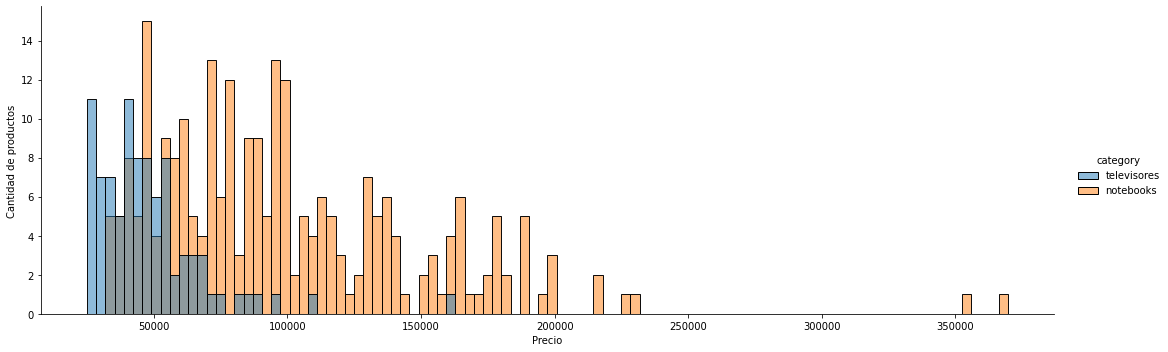

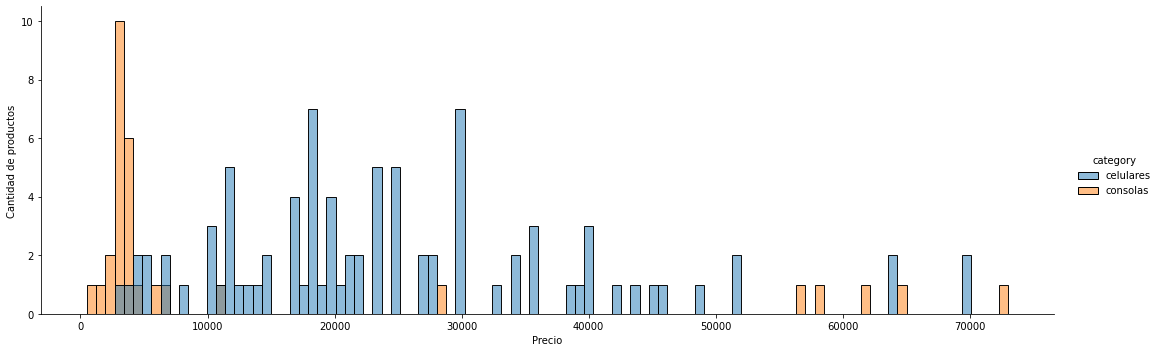

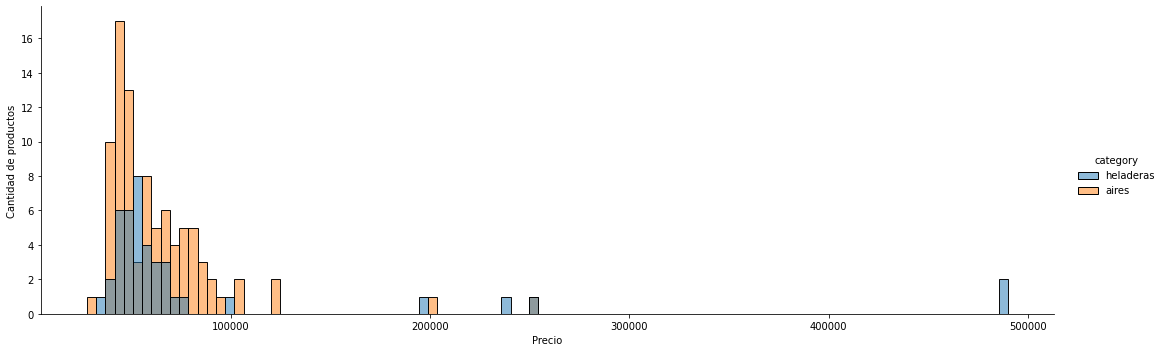

In [8]:
ax = sns.displot(elec, x="price", hue="category",  fill=True, bins=100, aspect=3)
ax.set(xlabel='Precio', ylabel='Cantidad de productos')
ax = sns.displot(elec2, x="price", hue="category", fill=True, bins=100, aspect=3)
ax.set(xlabel='Precio', ylabel='Cantidad de productos')
ax = sns.displot(elec3, x="price", hue="category", fill=True, bins=100, aspect=3)
ax.set(xlabel='Precio', ylabel='Cantidad de productos')
plt.show()

#### Se puede ver que hay mucha dispersión para una misma categoría, por ejemplo en el caso de los celulares o las notebooks, sin embargo esto puede deberse a dos cosas:
* Hay muchas gamas o modelos para una categoría, que generan este efecto tan disperso
* Hay muchos productos mal catalogados, que pueden estar afectando los resultados, por ejemplo carcasas de celulares, cargadores de notebooks o joysticks de consolas

##### Para eso puedo analizar que sucede con el desvío y los valores extremos

In [9]:
grouped_results.price.describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
aires,89.0,63429.377640,31662.275572,27999.20,44999.00,55999.000,70678.1000,252999.0
celulares,88.0,24991.743182,14822.579553,3239.00,14499.00,22099.000,30749.0000,69999.0
consolas,30.0,14390.341333,22792.426899,503.37,3009.25,3624.545,6429.6625,72999.0
heladeras,41.0,88863.001220,103638.802484,34999.00,47899.00,54833.000,64999.0000,489899.0
notebooks,253.0,99157.427470,50986.015082,31999.00,60999.00,89975.000,128999.0000,369600.0
televisores,90.0,47680.529667,20532.879701,24999.00,33174.00,44499.000,54749.0000,159999.0


#### Por ejemplo se puede ver que los celulares tienen una media de precio de aproximadamente ~21k pesos, pero el valor mínimo resulta ser de 3000 y el desvío es de casi 25k, lo que me da a pensar que puede ser que haya productos mal catalogados

In [10]:
celulares[celulares.price < 9000].head().title

1124       Celular Libre Barato Dual Sim Sky Rock  Amarillo Garantia
1168               Celular Libre Nokia 106 4 Mb Gris Oscuro 4 Mb Ram
1194         Teléfono Celular Kanji Kj-muv 3g Wi-fi Mp3 Whatsapp Lh 
1233    Celular Energizer E11 Personas Mayores Cámara Larga Duracion
1341                            Nokia 1100 Original 100% Garantizado
Name: title, dtype: object

In [11]:
consolas[consolas.price <= 4000].head().title

4011                             Consola Noganet Pocky 8 256mb Negra
4050       Consola De Video Juegos 8 Bit Family Game Retro +  Juegos
4052       Consola Retro Mini Family Game 620 Juegos Clásicos 8 Bits
4061      Consola Level Up Retro Nes Av 8 Bits 500 Juegos 2 Joystick
4066    Joystick P/ Consola Portatil Juegos Retro Sup Game 400 En 1 
Name: title, dtype: object

In [12]:
notebooks[notebooks.price <= 40000].head().title

4931    Notebook Exo Smart E19 Intel Celeron Ram4gb Ssd64gb Win10 14
4933    Notebook Cx Intel Atom 4gb Ram 64gb Ssd Full Hd 1080p Win 10
4935    Notebook Intel Celeron 4gb Ram 64gb Ssd Windows 10 Home Wifi
4936     Notebook Gadnic Glow Cloudbook Intel 4gb Windows 10 + Funda
4952    Notebook Exo Smart C19 Intel Celeron Ram4gb Ssd64gb Win10 14
Name: title, dtype: object

#### Analizando los resultados se puede ver que a pesar de que puede haber productos catalogados erróneamente, en realidad lo que sucede es que hay una gran espectro de modelos para una categoría, por lo cual no habrá que realizar una limpieza en los productos

### __¿Cuál es el promedio de descuento en cada categoría?__

In [13]:
grouped_results.discount_per.describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
aires,89.0,17.629213,8.631841,4.0,15.00,16.0,21.0,43.0
celulares,88.0,15.431818,7.360653,1.0,9.75,15.5,21.0,35.0
consolas,30.0,14.366667,9.890725,5.0,5.25,11.5,20.0,37.0
heladeras,41.0,15.536585,6.454059,5.0,11.00,15.0,20.0,33.0
notebooks,253.0,22.426877,9.808867,4.0,16.00,21.0,32.0,41.0
televisores,90.0,15.277778,6.846680,4.0,9.00,16.0,20.0,33.0


#### El promedio de descuento es de aprox el 15% para múltiples categorías, donde las notebooks tienen mayor porcentaje de descuento. Analizando los cuartiles, los descuentos se reparten de manera similar para todas las categorías.

### __¿Cómo es y cuanto influye en las ventas el porcentaje de descuento?__

#### Televisores

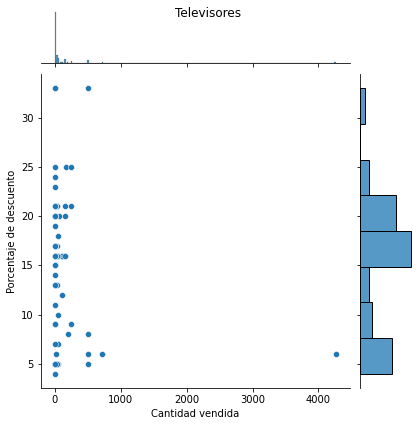

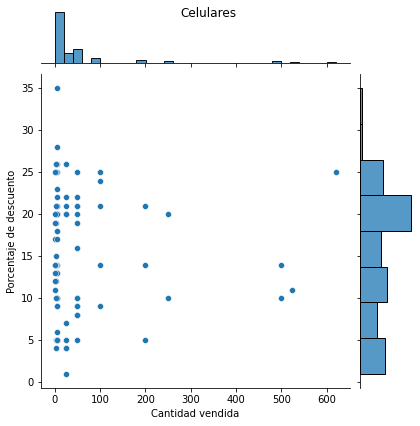

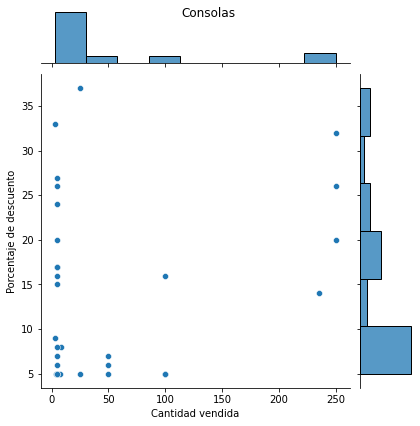

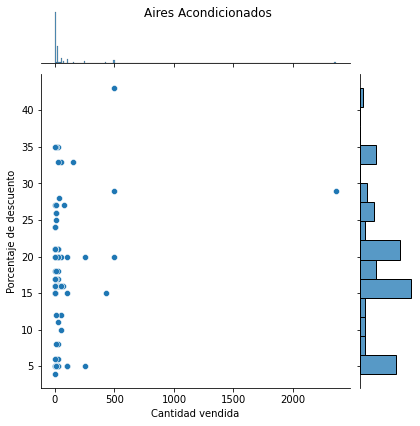

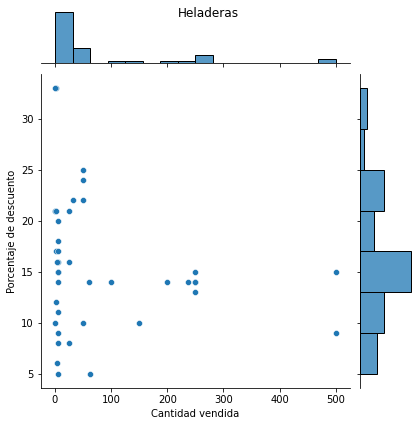

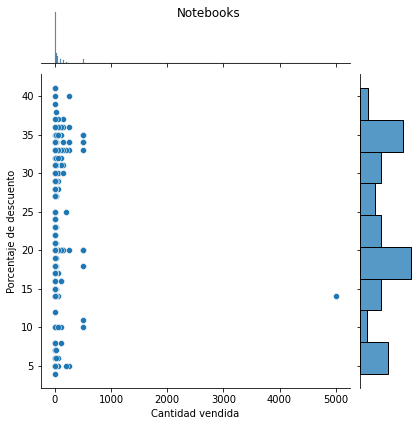

In [14]:
tvs_fig = sns.jointplot(data=tvs, x="sold_quantity", y="discount_per")
tvs_fig.set_axis_labels('Cantidad vendida', 'Porcentaje de descuento', fontsize=10)
tvs_fig.fig.suptitle("Televisores")

cel_fig = sns.jointplot(data=celulares, x="sold_quantity", y="discount_per")
cel_fig.set_axis_labels('Cantidad vendida', 'Porcentaje de descuento', fontsize=10)
cel_fig.fig.suptitle("Celulares")

con_fig = sns.jointplot(data=consolas, x="sold_quantity", y="discount_per")
con_fig.set_axis_labels('Cantidad vendida', 'Porcentaje de descuento', fontsize=10)
con_fig.fig.suptitle("Consolas")

air_fig = sns.jointplot(data=aires, x="sold_quantity", y="discount_per")
air_fig.set_axis_labels('Cantidad vendida', 'Porcentaje de descuento', fontsize=10)
air_fig.fig.suptitle("Aires Acondicionados")

hel_fig = sns.jointplot(data=heladeras, x="sold_quantity", y="discount_per")
hel_fig.set_axis_labels('Cantidad vendida', 'Porcentaje de descuento', fontsize=10)
hel_fig.fig.suptitle("Heladeras")

not_fig = sns.jointplot(data=notebooks, x="sold_quantity", y="discount_per")
not_fig.set_axis_labels('Cantidad vendida', 'Porcentaje de descuento', fontsize=10)
not_fig.fig.suptitle("Notebooks")

plt.show()

#### Estos gráficos permiten visualizar cómo se comportan las variables de ventas con el porcentaje de descuento, permitiendo entender cómo están correlacionadas. Lo que se puede ver es que en todas las categorías, hay muy pocos vendedores que canibalizan todas las ventas aunque no sean con el mayor descuento posible, en el caso de las notebooks por ejemplo el vendedor que vende más del doble que el segundo mayor vendedor vendió sus productos a un 15%.
#### Ignorando los vendedores outliers, se puede ver que hay vendedores que venden cantidades similares a otros, sin importar mucho cuanto es el descuento aplicado, esto lleva a pensar que el comprador no solo busca descuento, sino que pueden entrar en juego otras variables como reputación del vendedor, precio del producto, modelo, condiciones de venta y entrega, etc.

### __¿Cuáles son las marcas con mayores descuentos por categoría?__

[Text(0.5, 0, 'Marca'), Text(0, 0.5, 'Porcentaje de descuento')]

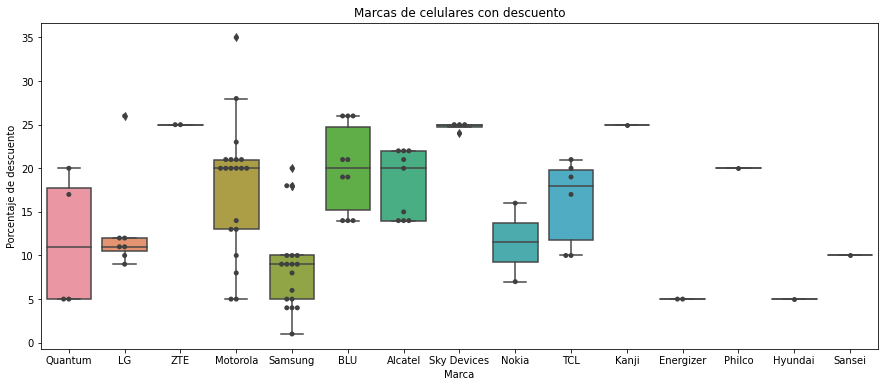

In [15]:
plt.figure(figsize = (15, 6))
ax = sns.boxplot(x="brand", y="discount_per", data=celulares)
ax = sns.swarmplot(x="brand", y="discount_per", data=celulares, color=".25")
ax.set_title("Marcas de celulares con descuento")
ax.set(xlabel='Marca', ylabel='Porcentaje de descuento')

[Text(0.5, 0, 'Marca'), Text(0, 0.5, 'Porcentaje de descuento')]

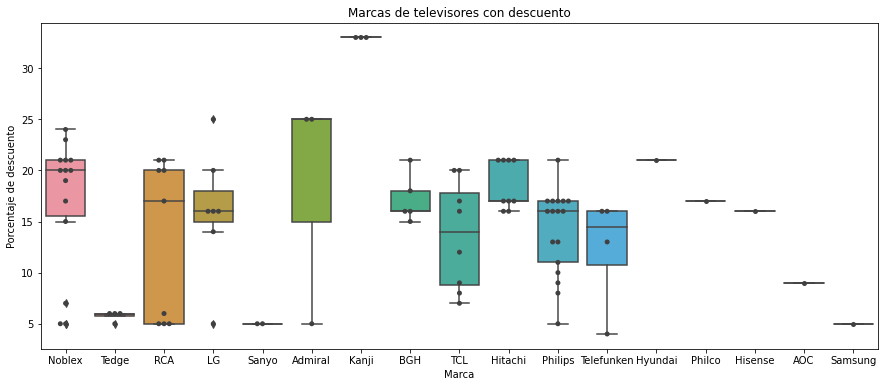

In [16]:
plt.figure(figsize = (15, 6))
ax = sns.boxplot(x="brand", y="discount_per", data=tvs)
ax = sns.swarmplot(x="brand", y="discount_per", data=tvs, color=".25")
ax.set_title("Marcas de televisores con descuento")
ax.set(xlabel='Marca', ylabel='Porcentaje de descuento')

/home/santi/venv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/santi/venv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Marca'), Text(0, 0.5, 'Porcentaje de descuento')]

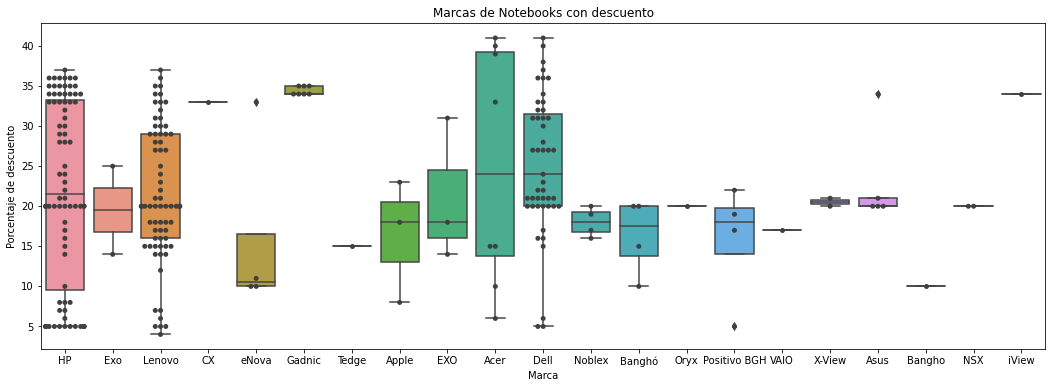

In [17]:
plt.figure(figsize = (18, 6))
ax = sns.boxplot(x="brand", y="discount_per", data=notebooks)
ax = sns.swarmplot(x="brand", y="discount_per", data=notebooks, color=".25")
ax.set_title("Marcas de Notebooks con descuento")
ax.set(xlabel='Marca', ylabel='Porcentaje de descuento')

#### Se puede ver que hay diferencias en las marcas que son publicadas con descuentos, habiendo algunas que tienen mayor variación  de porcentaje que otras, no siempre implica que sean las marcas más conocidas, por ejemplo Motorola ofrece la mayoría de sus productos con descuento con valores entre 15% y 20% y hay otras como BLU (menos conocida en el mercado) con mayor porcentaje de descuento.

#### Hay muchos modelos de notebooks con amplios rangos de descuentos

### __¿Existen marcas o modelos preferidos por los usuarios?__

##### Dada la naturaleza de los siguientes gráficos voy a tomar publicaciones con ciertas rangos de unidades vendidas (excluyendo las ventas outliers) para poder visualizar cómo influye el descuento en las marcas con 

#### Televisores
##### Para los televisores excluye al outlier de más de 3000 ventas, para mejorar la legibilidad

Text(0.5, 0.98, 'Ventas de televisores según la marca y el descuento aplicado')

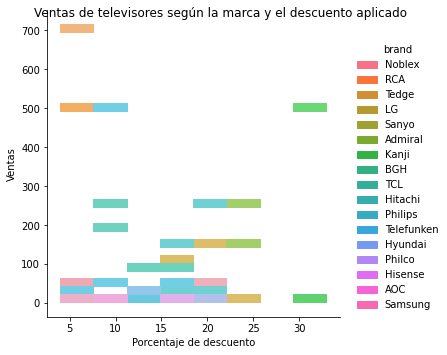

In [18]:
ax = sns.displot(tvs[tvs.sold_quantity <= 3000], x="discount_per", y="sold_quantity", hue="brand",)
ax.set(xlabel='Porcentaje de descuento', ylabel='Ventas')
ax.fig.suptitle("Ventas de televisores según la marca y el descuento aplicado")

#### Celulares
##### Tomo publicaciones con más de 5 ventas, para poder visualizar mejor el efecto del descuento en ciertas marcas

Text(0.5, 0.98, 'Ventas de celulares según la marca y el descuento aplicado')

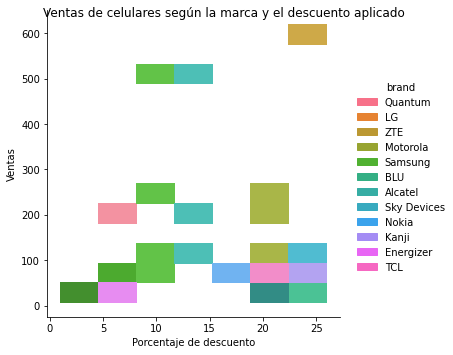

In [19]:
ax = sns.displot(celulares[celulares.sold_quantity > 5], x="discount_per", y="sold_quantity", hue="brand",)
ax.set(xlabel='Porcentaje de descuento', ylabel='Ventas')
ax.fig.suptitle("Ventas de celulares según la marca y el descuento aplicado")

#### Heladeras
##### Voy a tomar ventas realizadas

Text(0.5, 0.98, 'Ventas de heladeras según la marca y el descuento aplicado')

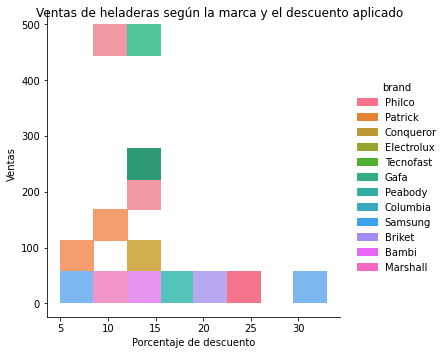

In [20]:
ax = sns.displot(heladeras[heladeras.sold_quantity > 0], x="discount_per", y="sold_quantity", hue="brand",)
ax.set(xlabel='Porcentaje de descuento', ylabel='Ventas')
ax.fig.suptitle("Ventas de heladeras según la marca y el descuento aplicado")

#### A simple vista se puede ver que hay ciertas preferencias de los usuarios en las marcas, y en muchos casos el descuento no es un determinante para elegir un producto, por ejemplo, las heladeras Philco alcanzan 500 ventas con 10% de descuento, habiendo otras marcas que concretan menos ventas con mayor descuento. Esto puede ser por el factor de preferencia de marca, precio o reputación del vendedor

### __¿Cuánto gastan los usuarios? y cómo lo hacen en función de las cuotas?__

Text(0.5, 1.0, 'Ventas de celulares según precio')

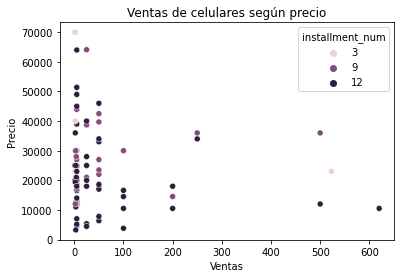

In [21]:
ax = sns.scatterplot(data=celulares[celulares.sold_quantity > 0], x='sold_quantity', y='price', hue='installment_num')
ax.set(xlabel='Ventas', ylabel='Precio')
ax.set_title("Ventas de celulares según precio")

Text(0.5, 1.0, 'Ventas de notebooks según precio')

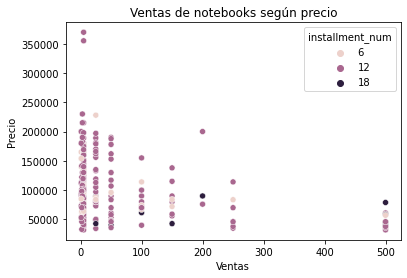

In [22]:
ax = sns.scatterplot(data=notebooks[(notebooks.sold_quantity > 0) & (notebooks.sold_quantity < 3000)], x='sold_quantity', y='price', hue='installment_num')
ax.set(xlabel='Ventas', ylabel='Precio')
ax.set_title("Ventas de notebooks según precio")

Text(0.5, 1.0, 'Ventas de tvs según precio')

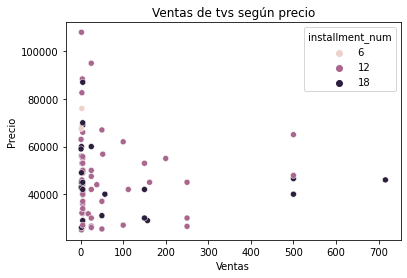

In [23]:
ax = sns.scatterplot(data=tvs[(tvs.sold_quantity > 0) & (tvs.sold_quantity < 3000)], x='sold_quantity', y='price', hue='installment_num')
ax.set(xlabel='Ventas', ylabel='Precio')
ax.set_title("Ventas de tvs según precio")

Text(0.5, 1.0, 'Ventas de heladeras según precio')

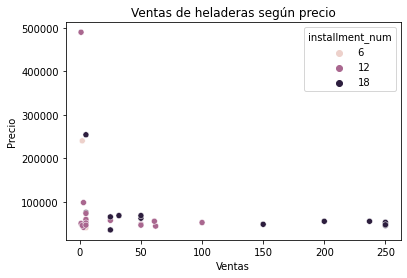

In [24]:
ax = sns.scatterplot(data=heladeras[(heladeras.sold_quantity > 0) & (heladeras.sold_quantity < 450)], x='sold_quantity', y='price', hue='installment_num')
ax.set(xlabel='Ventas', ylabel='Precio')
ax.set_title("Ventas de heladeras según precio")

#### Esto demuestra que los usuarios muchas veces no usan los descuentos por preferir marcas más accesibles en precios, comparando con el gráfico de descuento por ventas, se ve que hay numerosas ventas de productos con más de 35% de descuento, sin embargo son productos que tienen mucho mayor valor y no son la mayoría de las ventas

#### También cabe destacar que los usuarios prefieren comprar en la mayor cantidad posible de cuotas que ofrece el vendedor, independientemente de si el precio es muy alto

### __Cuáles son las categorías favoritas para comprar con descuento?__

In [25]:
grouped_results.sold_quantity.sum()

category
aires           6396
celulares       4893
consolas        1575
heladeras       3184
notebooks      18456
televisores     9785
Name: sold_quantity, dtype: int64

In [26]:
grouped_results.sold_quantity.sum() / grouped_total.sold_quantity.sum() * 100

category
aires          42.934819
celulares       5.286929
consolas        6.875327
heladeras      33.558179
notebooks      57.350611
televisores    35.618084
Name: sold_quantity, dtype: float64

#### Se puede ver que no todas las categorías tienen el mismo impacto cuando se venden con descuento, puesto que por ejemplo los celulares y los aires ambos venden aproximadamente la misma cantidad de unidades, pero los usuarios prefieren comprar aires con descuento puesto que representa el 36% de las ventas

##### Aclaración: Estas conclusiones son teniendo en cuenta, que solo se levantaron 1000 productos por cada categoría

### __¿Cómo impactan las ventas con el tipo de vendedor?__

Text(0.5, 1.0, 'Ventas de tv de vendedores según su stock (por ranking)')

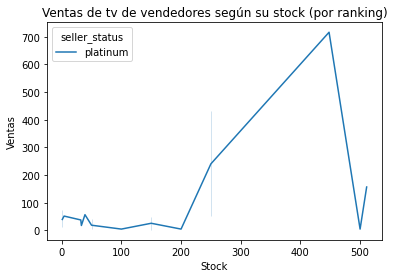

In [27]:
ax = sns.lineplot(data=tvs[tvs.sold_quantity <= 3000], x='available_quantity', y='sold_quantity', hue='seller_status' )
ax.set(xlabel='Stock', ylabel='Ventas')
ax.set_title("Ventas de tv de vendedores según su stock (por ranking)")

Text(0.5, 1.0, 'Ventas de celulares de vendedores según su stock (por ranking)')

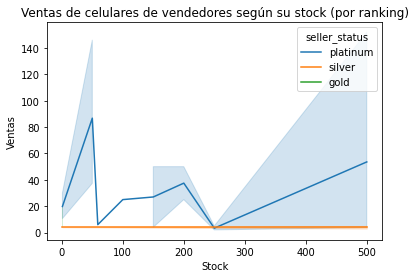

In [28]:
ax = sns.lineplot(data=celulares[celulares.sold_quantity <= 400], x='available_quantity', y='sold_quantity', hue='seller_status' )
ax.set(xlabel='Stock', ylabel='Ventas')
ax.set_title("Ventas de celulares de vendedores según su stock (por ranking)")

Text(0.5, 1.0, 'Ventas de notebooks de vendedores según su stock (por ranking)')

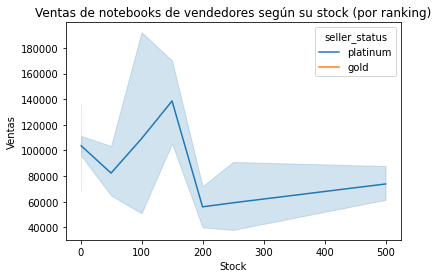

In [29]:
ax = sns.lineplot(data=notebooks, x='available_quantity', y='price', hue='seller_status' )
ax.set(xlabel='Stock', ylabel='Ventas')
ax.set_title("Ventas de notebooks de vendedores según su stock (por ranking)")

#### Se puede ver que casi todos los vendedores con descuento (al menos de las primeras 100 publicaciones) son platinum, por lo que pienso que no hay gran relevancia en su seller status, por otro lado, se puede visualizar que no hay una relación directa que asocie el stock de los vendedores con sus ventas, pero si que hay una tendencia que aquellos vendedores por arriba de 200 unidades disponibles acumulan de manera lineal un crecimiento en ventas

## __¿Cómo son las ventas según el stock inicial?__

Text(0.5, 1.0, 'Ventas de tv de vendedores según su stock inicial (por ranking)')

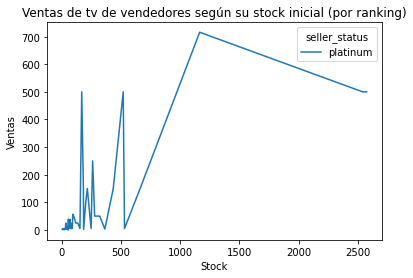

In [30]:
ax = sns.lineplot(data=tvs[tvs.sold_quantity <= 3000], x='initial_quantity', y='sold_quantity', hue='seller_status' )
ax.set(xlabel='Stock', ylabel='Ventas')
ax.set_title("Ventas de tv de vendedores según su stock inicial (por ranking)")

Text(0.5, 1.0, 'Ventas de Celulares de vendedores según su stock inicial (por ranking)')

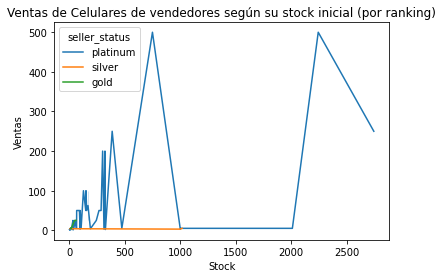

In [31]:
ax = sns.lineplot(data=celulares[celulares.sold_quantity <= 500], x='initial_quantity', y='sold_quantity', hue='seller_status' )
ax.set(xlabel='Stock', ylabel='Ventas')
ax.set_title("Ventas de Celulares de vendedores según su stock inicial (por ranking)")

Text(0.5, 1.0, 'Ventas de Heladeras de vendedores según su stock inicial (por ranking)')

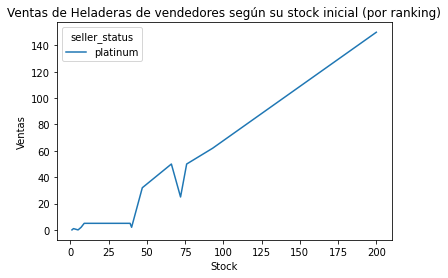

In [32]:
ax = sns.lineplot(data=heladeras, x='initial_quantity', y='sold_quantity', hue='seller_status' )
ax.set(xlabel='Stock', ylabel='Ventas')
ax.set_title("Ventas de Heladeras de vendedores según su stock inicial (por ranking)")

#### para algúnas cateogrías hay una relación mas lineal donde se destaca un incremento despues de cierta cantidad de stock inicial, parece ser una variable correlacionada con las ventas, tal vez porque indica que un vendedor es el proveedor oficial o por que salio al mercado como el primero en ofrecer el producto, al no tener las ventas históricas, estas no dejan de ser suposiciones

## __¿Cómo impacta en las ventas con descuento la cantidad de atributos que publican los vendedores y las variaciones que ofrecen?__

[Text(0.5, 0, 'Cant. atributos'), Text(0, 0.5, 'Ventas')]

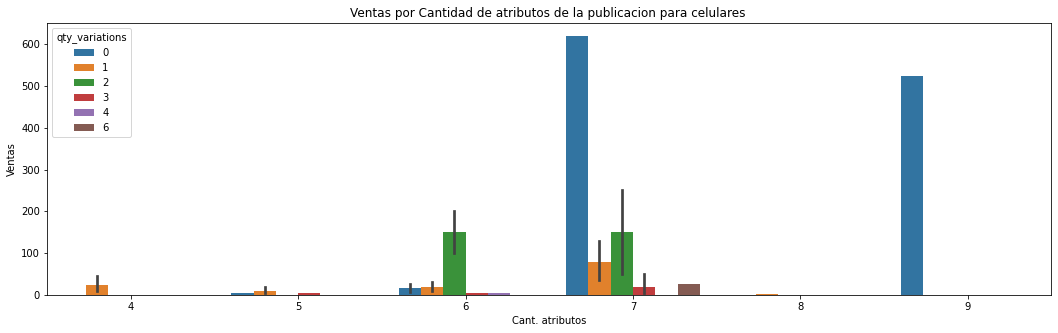

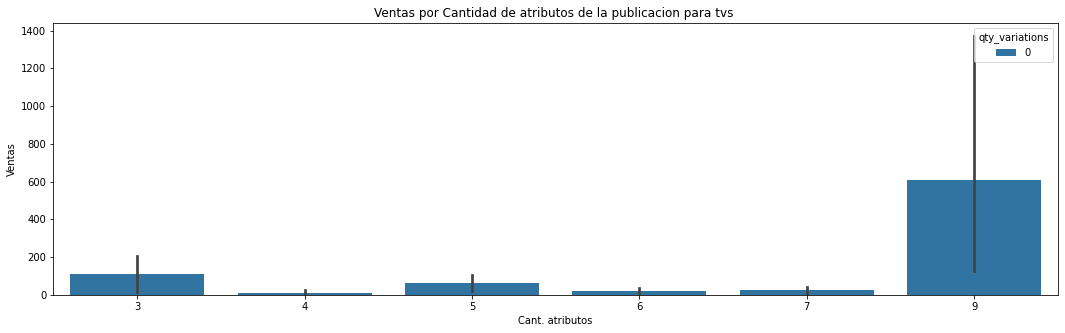

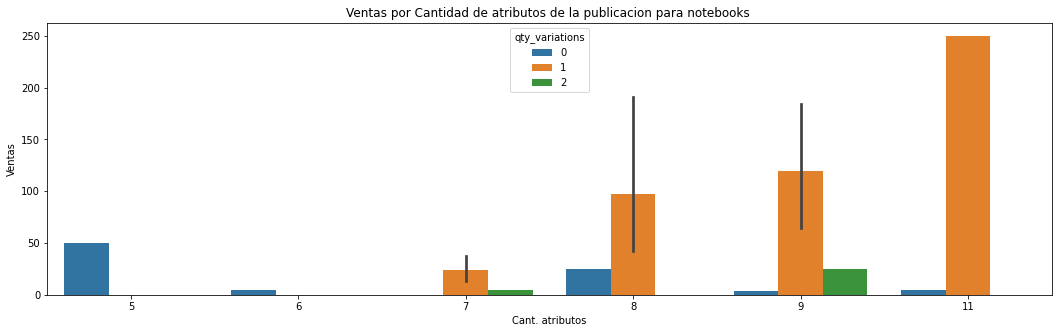

In [33]:

plt.figure(figsize = (18, 5))
ax = sns.barplot(x="qty_attributes", y="sold_quantity", data=celulares, hue='qty_variations')
ax.set_title("Ventas por Cantidad de atributos de la publicacion para celulares ")
ax.set(xlabel='Cant. atributos', ylabel='Ventas')


plt.figure(figsize = (18, 5))
ax = sns.barplot(x="qty_attributes", y="sold_quantity", data=tvs, hue='qty_variations')
ax.set_title("Ventas por Cantidad de atributos de la publicacion para tvs ")
ax.set(xlabel='Cant. atributos', ylabel='Ventas')


plt.figure(figsize = (18, 5))
ax = sns.barplot(x="qty_attributes", y="sold_quantity", data=notebooks, hue='qty_variations')
ax.set_title("Ventas por Cantidad de atributos de la publicacion para notebooks ")
ax.set(xlabel='Cant. atributos', ylabel='Ventas')

#### Se puede observar que hay una relación donde mayor cantidad de información subida por los vendedores, influye en la cantidad de ventas, puede deberse por la popularidad del mismo o por que una publicación bien formateada genera confianza al comprador de lo que esta comprando y a quien.
#### También cabe remarcar que mientras mas variaciones de un producto suben, hay una crecimiento en las ventas

## __¿Cómo son las ventas por la fotos con las que se publican?__

[Text(0.5, 0, 'Cant. fotos'), Text(0, 0.5, 'Ventas')]

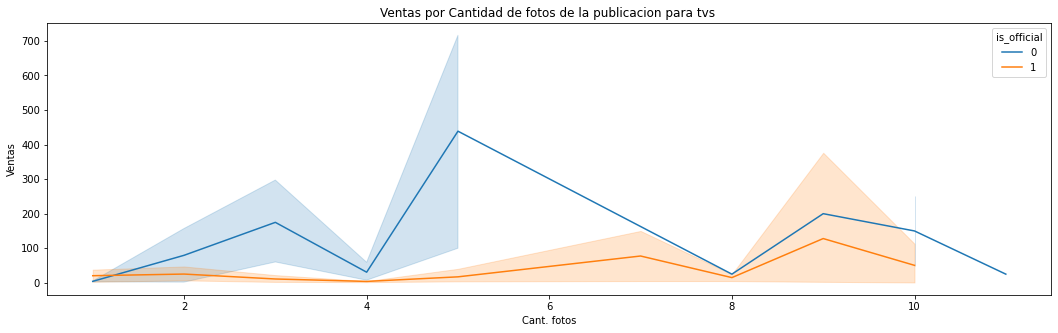

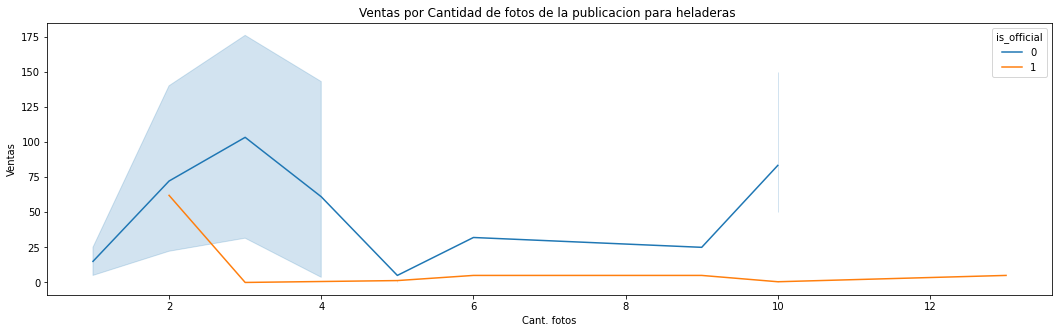

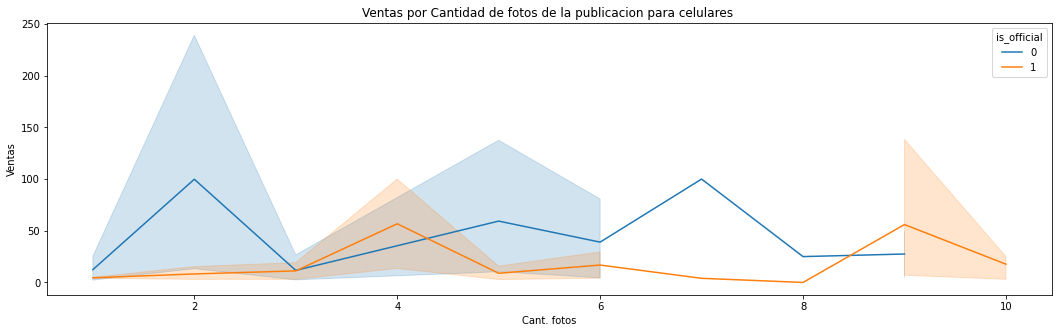

In [34]:
plt.figure(figsize = (18, 5))
ax = sns.lineplot(data=tvs[tvs.sold_quantity < 4000], x='pic_qty', y='sold_quantity', hue='is_official')
ax.set_title("Ventas por Cantidad de fotos de la publicacion para tvs ")
ax.set(xlabel='Cant. fotos', ylabel='Ventas')

plt.figure(figsize = (18, 5))
ax = sns.lineplot(data=heladeras[heladeras.sold_quantity < 500], x='pic_qty', y='sold_quantity', hue='is_official')
ax.set_title("Ventas por Cantidad de fotos de la publicacion para heladeras ")
ax.set(xlabel='Cant. fotos', ylabel='Ventas')

plt.figure(figsize = (18, 5))
ax = sns.lineplot(data=aires[aires.sold_quantity < 500], x='pic_qty', y='sold_quantity', hue='is_official')
ax.set_title("Ventas por Cantidad de fotos de la publicacion para celulares ")
ax.set(xlabel='Cant. fotos', ylabel='Ventas')

#### No hay una clara visualización de si la cantidad de fotos de la publicación influye en las ventas, sin embargo se ve que los vendedores no tiendas oficiales tienden a generar mas ventas que las tiendas oficiales con la misma cantidad de fotos 

In [35]:
grouped_results.is_official.value_counts()

category     is_official
aires        1               49
             0               40
celulares    1               68
             0               20
consolas     1               24
             0                6
heladeras    0               31
             1               10
notebooks    1              193
             0               60
televisores  1               52
             0               38
Name: is_official, dtype: int64

#### Y hay que remarcar que la cantidad de vendedores de tienda oficial y no oficial que venden con descuento en general son mas grandes los primeros que los segundos

## __Cómo es la correlación de variables para cada categoría?__

##### Solo se van a mostrar valores de correlación mayores a 0.2 y menores a -0.2

In [36]:
corr_columns = ['price', 'installment_num', 'discount_per', 'sold_quantity', 
                                      'installment_rate', 'available_quantity', 'qty_attributes', 
                                        'initial_quantity', 'qty_variations', 'has_free_shipping', 'has_video', 'is_official']

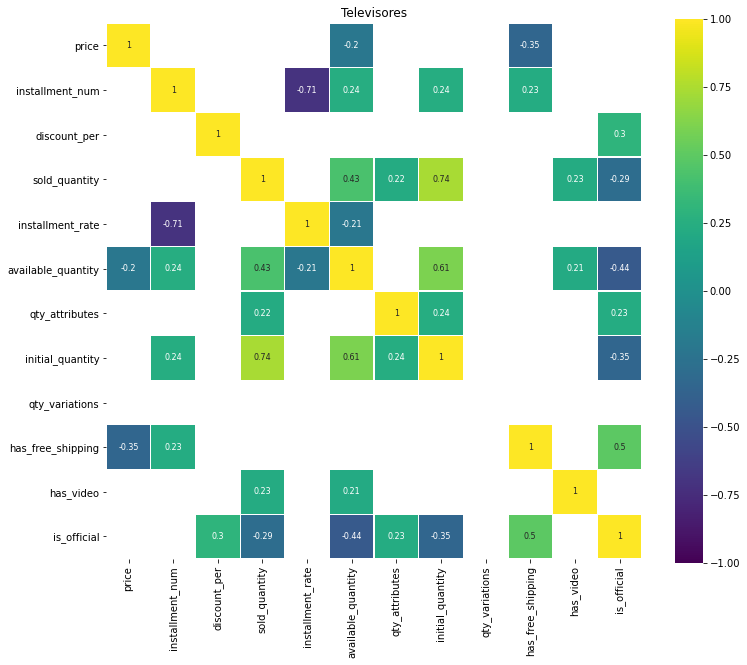

In [37]:
corr = tvs[(tvs.sold_quantity < 4000)][corr_columns].corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr>0.2) | (corr<-0.2)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);
ax.set_title('Televisores')
plt.show()

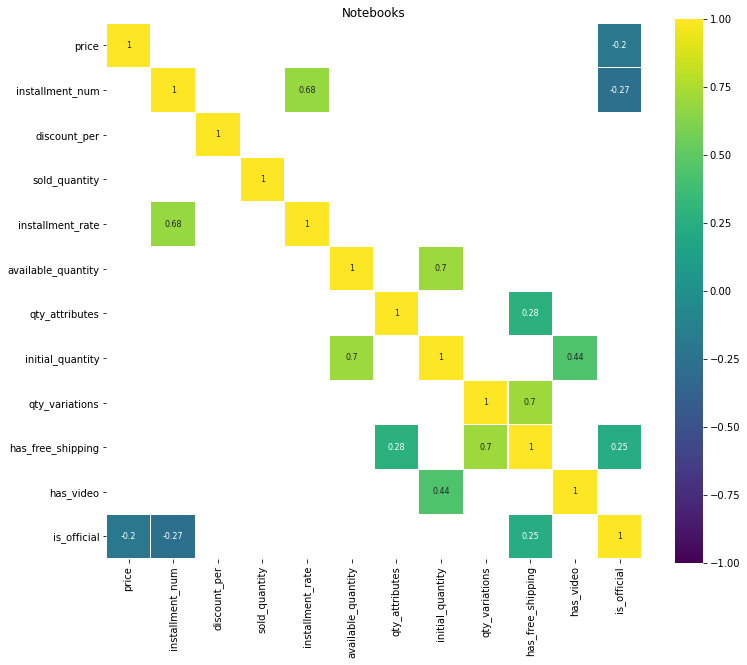

In [38]:
corr = notebooks[notebooks.sold_quantity < 100][corr_columns].corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr>0.2) | (corr<-0.2)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);
ax.set_title('Notebooks')
plt.show()

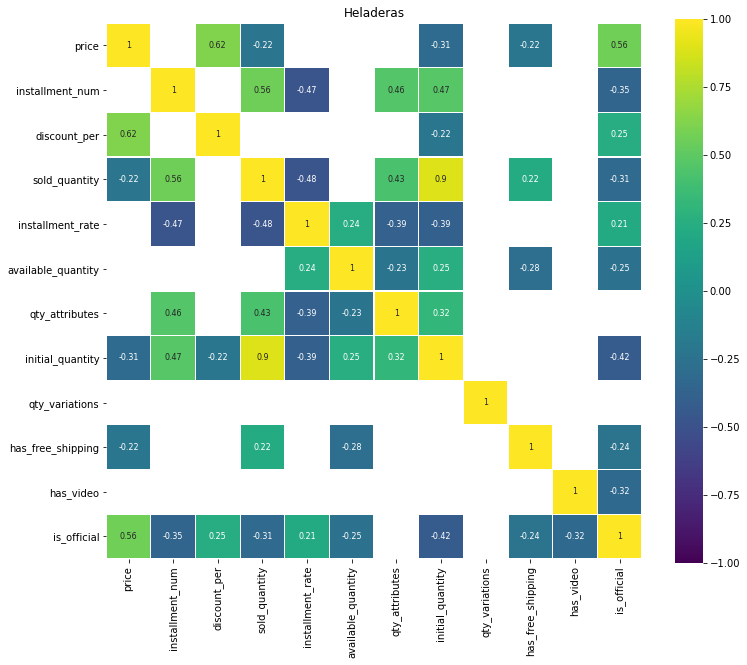

In [39]:
corr = heladeras[corr_columns].corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr>0.2) | (corr<-0.2)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);
ax.set_title('Heladeras')
plt.show()

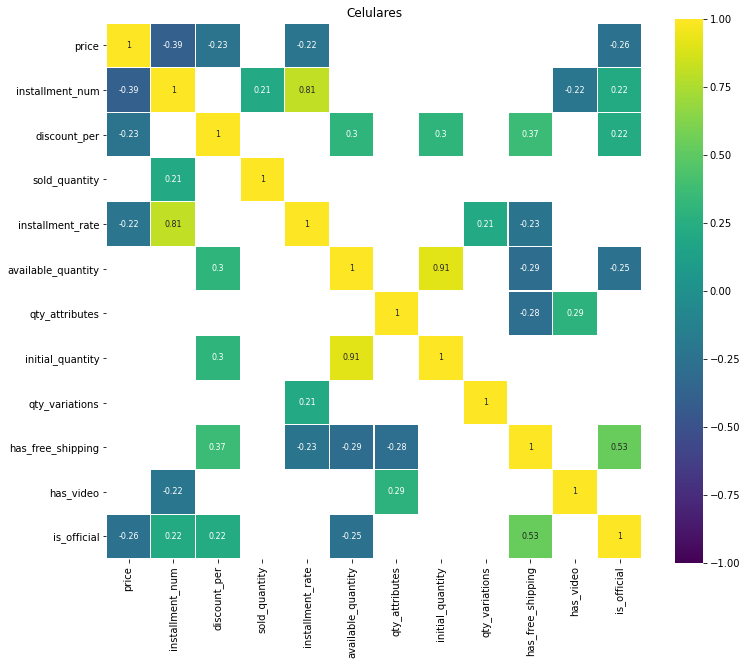

In [40]:
corr = celulares[celulares.sold_quantity < 30][corr_columns].corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr>0.2) | (corr<-0.2)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);
ax.set_title('Celulares')
plt.show()

#### Se puede ver que no hay una fuerte directa correlación entre las variables, los valores más altos no llegan a 0.5
##### __Nota__: se dejaron afuera los outliers de ventas que estaban muy apartados de la media